**Executive Summary**

In [2]:
import pandas as pd
from sympy.combinatorics.subsets import Subset
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Good_reads = pd.read_csv("/content/GoodReads.csv")
tution_income = pd.read_csv("/content/tuition_income.csv")
universities = pd.read_csv("/content/universities.csv")

In [4]:
tution_income.head()

name state  ...     net_cost         income_lvl
0  Piedmont International University    NC  ...  11475.00000        0 to 30,000
1  Piedmont International University    NC  ...  11451.00000   30,001 to 48,000
2  Piedmont International University    NC  ...  16229.00000   48_001 to 75,000
3  Piedmont International University    NC  ...  15592.00000  75,001 to 110,000
4  Piedmont International University    NC  ...  11668.39249        0 to 30,000

[5 rows x 7 columns]

In [5]:
universities.head()

Unnamed: 0  ... stem_percent
0           0  ...          NaN
1           1  ...          NaN
2           2  ...          NaN
3           3  ...          NaN
4           4  ...          NaN

[5 rows x 27 columns]

In [6]:
len(universities)

2159

In [7]:
universities_list = set(universities["state"])

In [8]:
print(universities_list)

{'Indiana', 'Maine', 'New Mexico', 'South Carolina', 'Oklahoma', 'Arizona', 'Delaware', 'Idaho', 'California', 'Alabama', 'North Carolina', 'Oregon', 'Nebraska', 'Georgia', 'Utah', 'Massachusetts', 'Arkansas', 'Minnesota', 'Pennsylvania', 'North Dakota', 'New Jersey', 'Louisiana', 'Iowa', 'Texas', 'Kansas', 'Virginia', 'Missouri', 'Ohio', 'New Hampshire', 'South Dakota', 'Kentucky', 'Rhode Island', 'Wyoming', 'Colorado', 'Connecticut', 'Florida', 'Alaska', 'Maryland', 'Mississippi', 'West Virginia', 'Montana', 'Vermont', 'Illinois', 'Nevada', 'Tennessee', 'Wisconsin', 'New York', 'Washington', 'Michigan', 'Hawaii'}


In [9]:
print(len(universities_list))

50


In [10]:
universities.columns

Index(['Unnamed: 0', 'name', 'total_enrollment', 'state', 'n_native',
       'n_asian', 'n_black', 'n_hispanic', 'n_pacific', 'n_nonresident',
       'n_total_minority', 'n_multiracial', 'n_unknown', 'n_white', 'n_women',
       'state_code', 'type', 'degree_length', 'room_and_board',
       'in_state_tuition', 'in_state_total', 'out_of_state_tuition',
       'out_of_state_total', 'early_career_pay', 'mid_career_pay',
       'make_world_better_percent', 'stem_percent'],
      dtype='object')

In [11]:
# new_york = universities[universities["state"] == "New York" ]
# Massachusetts = universities[universities["state"] == "Massachusetts" ]
# Connecticut = universities[universities["state"] == "Connecticut" ]
# Minnesota = universities[universities["state"] == "Minnesota" ]
# New_Jersey = universities[universities["state"] == "New Jersey" ]
# New_Hampshire = universities[universities["state"] == "New Hampshire" ]
# Colorado = universities[universities["state"] == "Colorado" ]
# North_Dakota = universities[universities["state"] == "North Dakota" ]
# Washington = universities[universities["state"] == "Washington" ]
# Hawaii = universities[universities["state"] == "Hawaii" ]

In [12]:
# combined_university = pd.concat([Massachusetts,Connecticut,Minnesota,New_Jersey,New_Hampshire,Colorado,North_Dakota,Washington,Hawaii,new_york])

In [13]:
early_pay = universities[universities["early_career_pay"] > 40000]

In [14]:
early_pay.head()

Unnamed: 0  ... stem_percent
5            5  ...          3.0
10          10  ...         26.0
17          17  ...          6.0
18          18  ...          2.0
21          21  ...          2.0

[5 rows x 27 columns]

In [15]:
len(early_pay)

609

In [16]:
early_pay_universities = set(early_pay["name"])
print(early_pay_universities)
print("The number of universities having early pay greater than 40,000 is", len(early_pay_universities))

{'Centenary College of Louisiana', 'Cleary University', 'Wayne State University', 'Northern Kentucky University', 'University of Detroit Mercy', 'Peru State College', 'University of Illinois at Chicago', 'Maryville College', 'Delta State University', 'Lake Superior State University', 'Rhode Island School of Design', 'LeTourneau University', 'University of Central Oklahoma', 'San Jose State University', 'Wittenberg University', 'William Jewell College', 'Oklahoma City University', 'University of North Georgia', 'University of Wisconsin-Stout', 'Illinois Wesleyan University', 'William Paterson University of New Jersey', 'Roanoke College', 'University of Rochester', 'Louisiana College', 'Athens State University', 'Bowdoin College', "St. Mary's University", 'Western New Mexico University', 'Wellesley College', 'Black Hills State University', 'Hampden-Sydney College', 'Columbus State University', 'Granite State College', 'University of the Ozarks', 'Western Oregon University', 'Central Coll

**3.**

In [17]:
not_public = universities[universities["type"] != "Public"]

In [18]:
not_public.tail()

Unnamed: 0  ... stem_percent
2149        2149  ...          NaN
2150        2150  ...          NaN
2151        2151  ...          NaN
2152        2152  ...          NaN
2155        2155  ...          NaN

[5 rows x 27 columns]

In [19]:
len(not_public["name"])

1014

In [20]:
not_public_universities = set(not_public["name"])
print(not_public_universities)
print("The total number of universities that are not public are: ", len(not_public_universities))

{'Centenary College of Louisiana', 'University of the Incarnate Word', 'University of Charleston', 'Restaurant School at Walnut Hill College', 'Cleary University', 'Columbia College Hollywood', 'Ohio Christian University', 'Lincoln Christian University', 'Southern California Institute of Architecture', 'Welch College', 'Alverno College', 'Assumption College', 'Rochester College', 'Design Institute of San Diego', 'Dominican College of Blauvelt', 'Nyack College', 'University of Detroit Mercy', 'Maryville College', 'Vassar College', 'Rhode Island School of Design', 'LeTourneau University', 'Silver Lake College of the Holy Family', 'Wittenberg University', 'Grand View University', 'Yeshiva Gedolah Rabbinical College', "Paul Smith's College", 'Young Harris College', 'Gwinnett College', 'William Jewell College', 'Wilkes University', 'LIM College', 'Texas Lutheran University', 'Baptist Bible College', 'Beulah Heights University', 'Jewish Theological Seminary of America', 'Marygrove College', 

In [21]:
len(not_public["name"].unique())

1014

In [22]:
universities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 2159 non-null   int64  
 1   name                       2159 non-null   object 
 2   total_enrollment           2159 non-null   int64  
 3   state                      2159 non-null   object 
 4   n_native                   2159 non-null   int64  
 5   n_asian                    2159 non-null   int64  
 6   n_black                    2159 non-null   int64  
 7   n_hispanic                 2159 non-null   int64  
 8   n_pacific                  2159 non-null   int64  
 9   n_nonresident              2159 non-null   int64  
 10  n_total_minority           2159 non-null   int64  
 11  n_multiracial              2159 non-null   int64  
 12  n_unknown                  2159 non-null   int64  
 13  n_white                    2159 non-null   int64

In [23]:
universities.describe()

Unnamed: 0  total_enrollment  ...  make_world_better_percent  stem_percent
count  2159.000000       2159.000000  ...                 623.000000     640.00000
mean   1079.000000       6183.759611  ...                  53.576244      16.83750
std     623.393936       8263.639874  ...                   8.804972      15.80481
min       0.000000         15.000000  ...                  34.000000       0.00000
25%     539.500000       1352.000000  ...                  48.000000       7.00000
50%    1079.000000       3133.000000  ...                  52.000000      13.00000
75%    1618.500000       7644.500000  ...                  58.000000      22.00000
max    2158.000000      81459.000000  ...                  94.000000     100.00000

[8 rows x 22 columns]

In [24]:
len(universities)

2159

In [25]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
universities.isna()

Unnamed: 0   name  total_enrollment  state  n_native  n_asian  n_black  n_hispanic  n_pacific  n_nonresident  n_total_minority  n_multiracial  n_unknown  n_white  n_women  state_code   type  degree_length  room_and_board  in_state_tuition  in_state_total  out_of_state_tuition  out_of_state_total  early_career_pay  mid_career_pay  make_world_better_percent  stem_percent
0          False  False             False  False     False    False    False       False      False          False             False          False      False    False    False       False  False          False            True             False           False                 False               False              True            True                       True          True
1          False  False             False  False     False    False    False       False      False          False             False          False      False    False    False       False  False          False           False             False           False                 False               False              True            True                       True          True
2          False  False             False  False     False    False    False       False      False          False             False          False      False    False    False       False  False          False           False             False           False                 False               False              True            True                       True          True
3          False  False             False  False     False    False    False       False      False          False             False          False      False    False    False       False  False          False            True             False           False                 False               False              True            True                       True          True
4          False  False             False  False     False    False    False       False      False          False             False          False      False    False    False       False  False          False           False             False           False                 False               False              True            True                       True          True
...          ...    ...               ...    ...       ...      ...      ...         ...        ...            ...               ...            ...        ...      ...      ...         ...    ...            ...             ...               ...             ...                   ...                 ...               ...             ...                        ...           ...
2154       False  False             False  False     False    False    False       False      False          False             False          False      False    False    False       False  False          False            True             False           False                 False               False              True            True                       True          True
2155       False  False             False  False     False    False    False       False      False          False             False          False      False    False    False       False  False          False           False             False           False                 False               False              True            True                       True          True
2156       False  False             False  False     False    False    False       False      False          False             False          False      False    False    False       False  False          False           False             False           False                 False               False              True            True                       True          True
2157       False  False             False  False     False    False    False       False      False          False             False          False      False    False    False       False  False          False            True

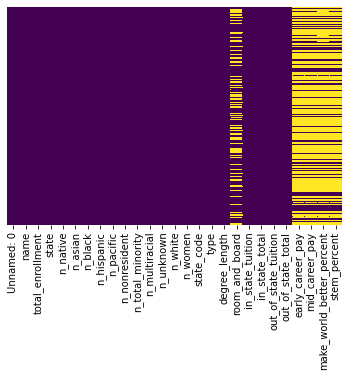

In [26]:
 sns.heatmap(universities.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [27]:
pd.Categorical(universities.value_counts())

[1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1]
Length: 598
Categories (1, int64): [1]

In [28]:
pd.Categorical(universities.value_counts().count())

[598]
Categories (1, int64): [598]

In [29]:
pd.Categorical(universities)

['Unnamed: 0', 'name', 'total_enrollment', 'state', 'n_native', ..., 'out_of_state_total', 'early_career_pay', 'mid_career_pay', 'make_world_better_percent', 'stem_percent']
Length: 27
Categories (27, object): ['Unnamed: 0', 'degree_length', 'early_career_pay', 'in_state_total', ..., 'state_code', 'stem_percent', 'total_enrollment', 'type']

In [30]:
universities.value_counts().index

MultiIndex([(2148,                   'Yeshiva University',  6348,    'New York',  6,   289,  144,  199,  15,  643,   682,   29,  931,  4092,  3283, 'NY', 'Private', '4 Year', 12250.0, 43500, 55750, 43500, 55750, 63500.0, 112800.0, 40.0, 11.0),
            ( 871,              'John Carroll University',  3688,        'Ohio',  2,    62,  186,  110,   0,   86,   437,   77,   74,  3091,  1870, 'OH', 'Private', '4 Year', 11874.0, 41340, 53214, 41340, 53214, 51600.0,  97300.0, 39.0, 16.0),
            ( 863, 'Jefferson College of Health Sciences',  1131,    'Virginia',  1,    28,   82,   40,   0,    2,   165,   14,   27,   937,   903, 'VA', 'Private', '4 Year',  5870.0, 26886, 32756, 26886, 32756, 55500.0,  97600.0, 86.0,  1.0),
            ( 857,             'James Madison University', 20855,    'Virginia', 31,   889,  863, 1043,  39,  495,  3574,  709,  676, 16110, 12428, 'VA',  'Public', '4 Year', 10092.0, 12016, 22108, 28416, 38508, 57400.0, 102600.0, 42.0, 12.0),
            ( 855,      

In [31]:
universities.value_counts().count()

598

In [32]:
cat_combined_university = universities.select_dtypes(include=['object']).copy()

In [33]:
cat_combined_university.head()

name       state state_code        type degree_length
0                Aaniiih Nakoda College     Montana         MT      Public        2 Year
1          Abilene Christian University       Texas         TX     Private        4 Year
2  Abraham Baldwin Agricultural College     Georgia         GA      Public        2 Year
3                       Academy College   Minnesota         MN  For Profit        2 Year
4             Academy of Art University  California         CA  For Profit        4 Year

In [34]:
len(cat_combined_university)

2159

In [35]:
pd.Categorical(cat_combined_university)

['name', 'state', 'state_code', 'type', 'degree_length']
Categories (5, object): ['degree_length', 'name', 'state', 'state_code', 'type']

In [36]:
universities["name"].value_counts()

Middlesex Community College        2
Bryant University                  1
Cornell University                 1
Southern Arkansas University       1
South Coast College                1
                                  ..
Saint Leo University               1
Christopher Newport University     1
University of South Alabama        1
Defiance College                   1
Saint Joseph's College of Maine    1
Name: name, Length: 2158, dtype: int64

In [37]:
universities["state"].value_counts()

California        194
Texas             124
New York          121
Pennsylvania      109
North Carolina    106
Illinois           95
Ohio               87
Massachusetts      78
Georgia            68
Michigan           66
Florida            64
Virginia           58
Tennessee          50
Missouri           48
Minnesota          45
South Carolina     45
Washington         45
Alabama            43
Kansas             41
Kentucky           40
New Jersey         40
Iowa               40
Wisconsin          39
Oregon             34
Maryland           32
Oklahoma           32
Arkansas           31
Arizona            31
Mississippi        30
Connecticut        30
Colorado           29
Indiana            27
Louisiana          25
Nebraska           23
Maine              22
West Virginia      22
New Mexico         19
New Hampshire      18
South Dakota       16
North Dakota       16
Vermont            15
Montana            14
Rhode Island       10
Idaho              10
Nevada              7
Wyoming   

In [38]:
universities["state_code"].value_counts()

CA    195
TX    124
NY    122
PA    109
NC    106
IL     95
OH     87
MA     77
GA     68
MI     66
FL     64
VA     58
TN     50
MO     48
SC     45
MN     45
WA     44
AL     43
KS     41
IA     40
KY     40
NJ     40
WI     39
OR     34
CT     32
MD     32
OK     32
AR     31
MS     30
AZ     29
CO     29
IN     27
LA     25
NE     23
WV     22
ME     22
NM     19
NH     18
ND     16
SD     16
VT     15
MT     14
RI     10
ID     10
NV      7
WY      6
UT      4
DE      4
HI      3
AK      3
Name: state_code, dtype: int64

In [39]:
universities["type"].value_counts()

Public        1145
Private        955
For Profit      59
Name: type, dtype: int64

In [40]:
universities["degree_length"].value_counts()

4 Year    1296
2 Year     863
Name: degree_length, dtype: int64

<Figure size 720x720 with 0 Axes>

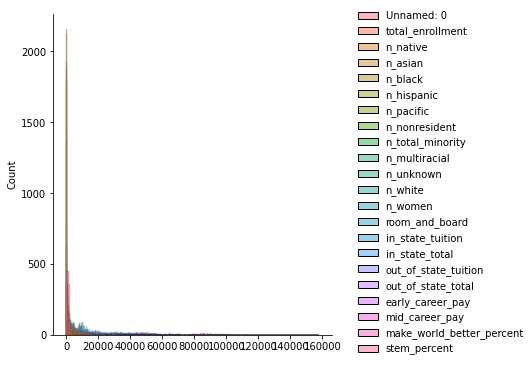

In [41]:
 fig = plt.figure(figsize=(10,10))
 sns.displot(universities)
 plt.show()

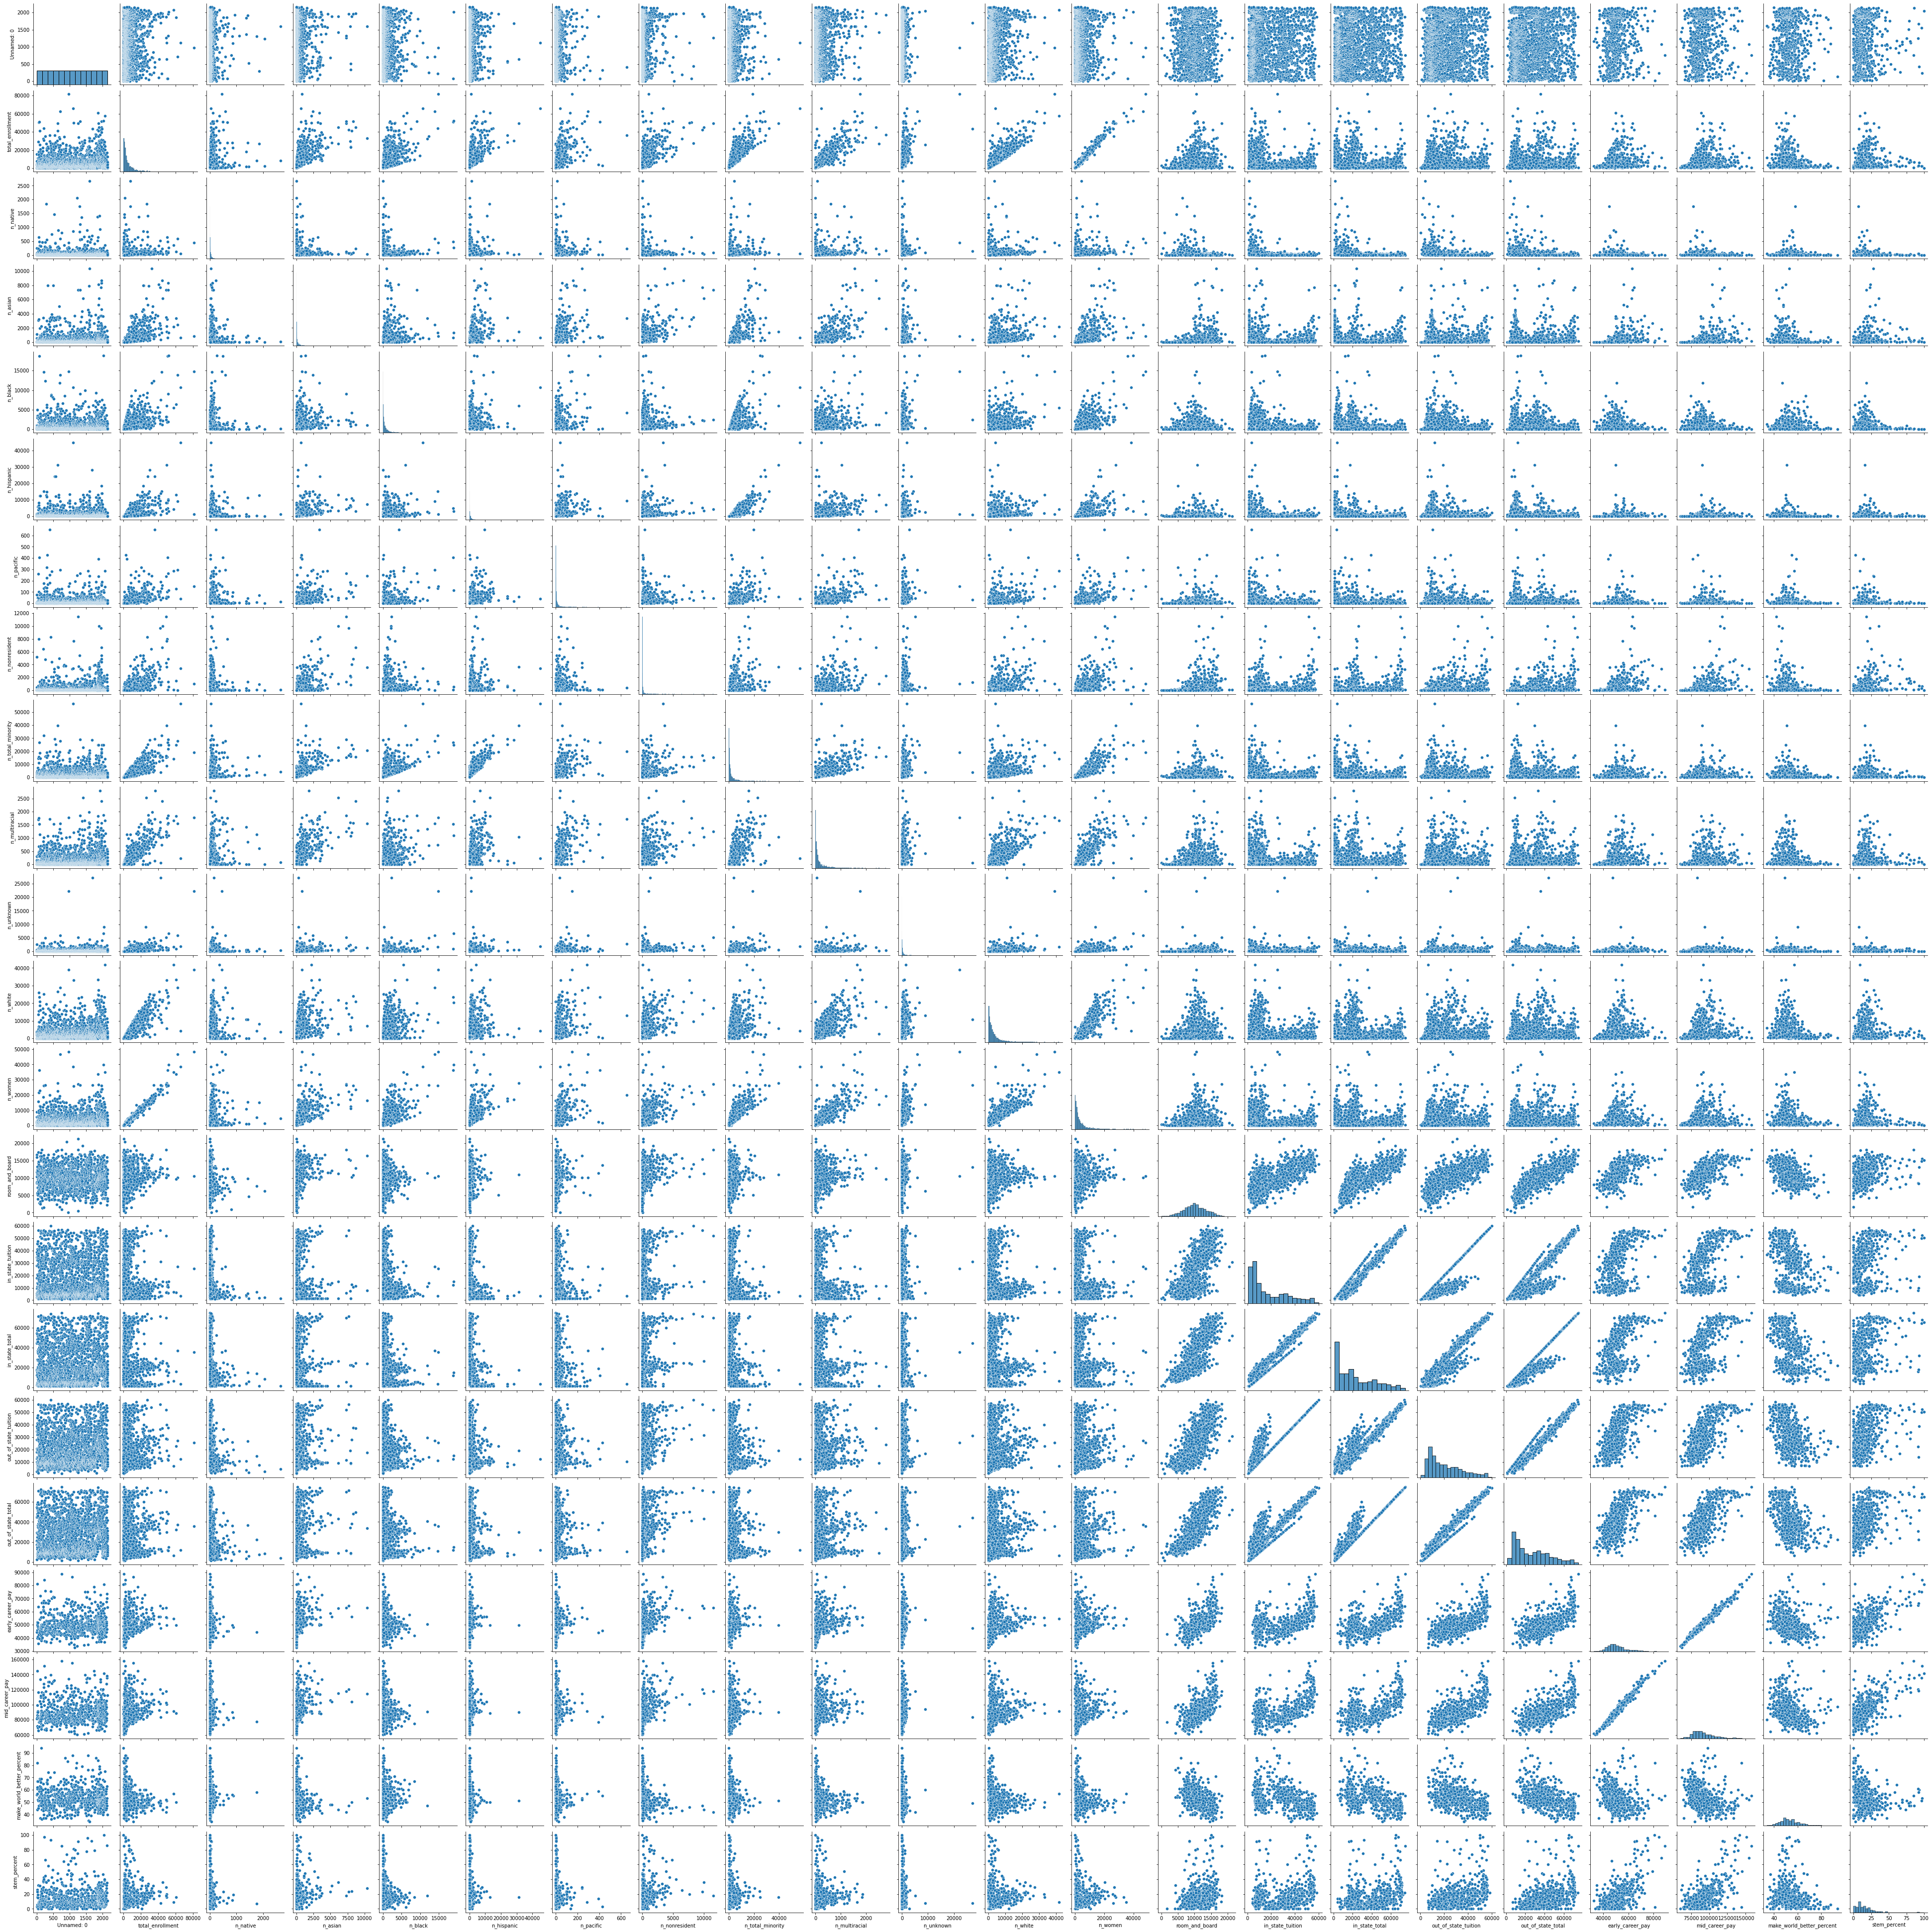

In [42]:
sns.pairplot(universities)

In [43]:
universities.describe()

Unnamed: 0  total_enrollment     n_native       n_asian      n_black    n_hispanic    n_pacific  n_nonresident  n_total_minority  n_multiracial     n_unknown       n_white       n_women  room_and_board  in_state_tuition  in_state_total  out_of_state_tuition  out_of_state_total  early_career_pay  mid_career_pay  make_world_better_percent  stem_percent
count  2159.000000       2159.000000  2159.000000   2159.000000   2159.00000   2159.000000  2159.000000    2159.000000       2159.000000    2159.000000   2159.000000   2159.000000   2159.000000     1396.000000       2159.000000     2159.000000           2159.000000         2159.000000        640.000000      640.000000                 623.000000     640.00000
mean   1079.000000       6183.759611    46.315424    321.538675    775.05836    932.883279    14.566929     271.521075       2265.655396     175.292728    300.410375   3346.172765   3486.558592    10053.608166      17044.020380    23544.639648          20797.981936        27298.601204      50873.906250    92023.593750                  53.576244      16.83750
std     623.393936       8263.639874   138.067112    838.747949   1478.03432   2434.064950    36.576453     796.270123       3992.615792     290.711571    919.710526   4381.840658   4627.776379     3252.869008      15460.761214    19782.172508          13725.290292        18220.616900       8316.515822    15916.844442                   8.804972      15.80481
min       0.000000         15.000000     0.000000      0.000000      0.00000      0.000000     0.000000       0.000000          0.000000       0.000000      0.000000      0.000000      0.000000       30.000000        480.000000      962.000000            480.000000         1376.000000      32500.000000    60100.000000                  34.000000       0.00000
25%     539.500000       1352.000000     4.000000     14.000000     74.00000     47.000000     1.000000       5.000000        283.000000      18.000000     24.500000    730.000000    773.500000     7879.000000       4695.000000     5552.000000           9298.000000        11018.000000      45300.000000    81000.000000                  48.000000       7.00000
50%    1079.000000       3133.000000    14.000000     55.000000    244.00000    175.000000     4.000000      38.000000        767.000000      62.000000    105.000000   1839.000000   1882.000000     9955.000000      10161.000000    17749.000000          17045.000000        23036.000000      49400.000000    88750.000000                  52.000000      13.00000
75%    1618.500000       7644.500000    39.000000    222.000000    826.00000    689.500000    13.000000     160.000000       2449.000000     193.000000    296.000000   4124.500000   4390.000000    12355.000000      28780.000000    38519.000000          29865.000000        40154.000000      54800.000000    99900.000000                  58.000000      22.00000
max    2158.000000      81459.000000  2659.000000  10381.000000  18914.00000  44870.000000   653.000000   11495.000000      56561.000000    2801.000000  27213.000000  41898.000000  48329.000000    21300.000000      59985.000000    75003.000000          59985.000000        75003.000000      88800.000000   158200.000000                  94.000000     100.00000

In [44]:
universities.isna()

Unnamed: 0   name  total_enrollment  state  n_native  n_asian  n_black  n_hispanic  n_pacific  n_nonresident  n_total_minority  n_multiracial  n_unknown  n_white  n_women  state_code   type  degree_length  room_and_board  in_state_tuition  in_state_total  out_of_state_tuition  out_of_state_total  early_career_pay  mid_career_pay  make_world_better_percent  stem_percent
0          False  False             False  False     False    False    False       False      False          False             False          False      False    False    False       False  False          False            True             False           False                 False               False              True            True                       True          True
1          False  False             False  False     False    False    False       False      False          False             False          False      False    False    False       False  False          False           False             False           False                 False               False              True            True                       True          True
2          False  False             False  False     False    False    False       False      False          False             False          False      False    False    False       False  False          False           False             False           False                 False               False              True            True                       True          True
3          False  False             False  False     False    False    False       False      False          False             False          False      False    False    False       False  False          False            True             False           False                 False               False              True            True                       True          True
4          False  False             False  False     False    False    False       False      False          False             False          False      False    False    False       False  False          False           False             False           False                 False               False              True            True                       True          True
...          ...    ...               ...    ...       ...      ...      ...         ...        ...            ...               ...            ...        ...      ...      ...         ...    ...            ...             ...               ...             ...                   ...                 ...               ...             ...                        ...           ...
2154       False  False             False  False     False    False    False       False      False          False             False          False      False    False    False       False  False          False            True             False           False                 False               False              True            True                       True          True
2155       False  False             False  False     False    False    False       False      False          False             False          False      False    False    False       False  False          False           False             False           False                 False               False              True            True                       True          True
2156       False  False             False  False     False    False    False       False      False          False             False          False      False    False    False       False  False          False           False             False           False                 False               False              True            True                       True          True
2157       False  False             False  False     False    False    False       False      False          False             False          False      False    False    False       False  False          False            True

In [45]:
universities.isnull().sum()

Unnamed: 0                      0
name                            0
total_enrollment                0
state                           0
n_native                        0
n_asian                         0
n_black                         0
n_hispanic                      0
n_pacific                       0
n_nonresident                   0
n_total_minority                0
n_multiracial                   0
n_unknown                       0
n_white                         0
n_women                         0
state_code                      0
type                            0
degree_length                   0
room_and_board                763
in_state_tuition                0
in_state_total                  0
out_of_state_tuition            0
out_of_state_total              0
early_career_pay             1519
mid_career_pay               1519
make_world_better_percent    1536
stem_percent                 1519
dtype: int64

In [46]:
(universities["degree_length"].value_counts())/len(universities)*100

4 Year    60.027791
2 Year    39.972209
Name: degree_length, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split
X = universities.drop(["degree_length"], axis = 1)
y = universities["degree_length"]
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0, stratify = y)

In [48]:
x_train["degree_length"] = y_train
x_test["degree_length"] = y_test

In [49]:
train = x_train
test = x_test

In [50]:
(train["degree_length"].value_counts())/len(train)*100

4 Year    60.026473
2 Year    39.973527
Name: degree_length, dtype: float64

In [51]:
(test["degree_length"].value_counts())/len(test)*100

4 Year    60.030864
2 Year    39.969136
Name: degree_length, dtype: float64

In [52]:
train.in_state_total.describe()

count     1511.000000
mean     23626.509596
std      19683.009728
min        962.000000
25%       5640.000000
50%      17886.000000
75%      38989.000000
max      74580.000000
Name: in_state_total, dtype: float64

In [53]:
test.in_state_total.describe()

count      648.000000
mean     23353.736111
std      20025.496314
min       1154.000000
25%       5310.000000
50%      17416.000000
75%      37097.000000
max      75003.000000
Name: in_state_total, dtype: float64

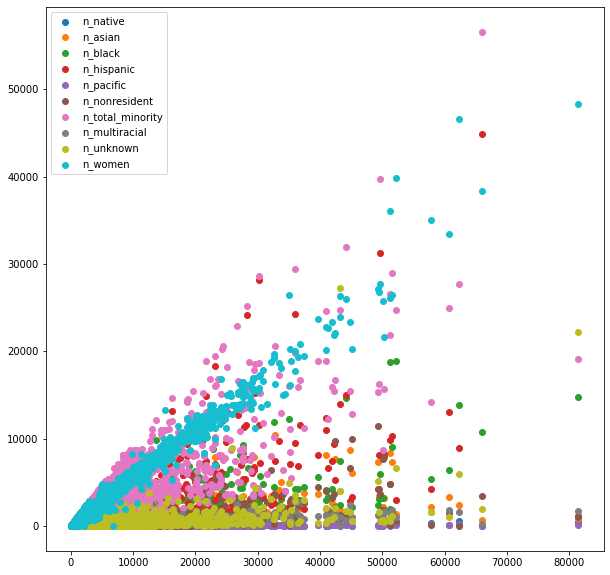

In [54]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(universities["total_enrollment"], universities["n_native"], label = "n_native")
ax.scatter(universities["total_enrollment"], universities["n_asian"], label = "n_asian")
ax.scatter(universities["total_enrollment"], universities["n_black"], label = "n_black")
ax.scatter(universities["total_enrollment"], universities["n_hispanic"], label = "n_hispanic")
ax.scatter(universities["total_enrollment"], universities["n_pacific"], label = "n_pacific")
ax.scatter(universities["total_enrollment"], universities["n_nonresident"], label = "n_nonresident")
ax.scatter(universities["total_enrollment"], universities["n_total_minority"], label = "n_total_minority")
ax.scatter(universities["total_enrollment"], universities["n_multiracial"], label = "n_multiracial")
ax.scatter(universities["total_enrollment"], universities["n_unknown"], label = "n_unknown")
ax.scatter(universities["total_enrollment"], universities["n_women"], label = "n_women")
plt.legend()

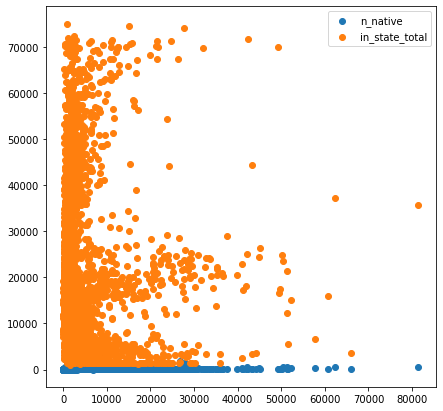

In [55]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.scatter(universities["total_enrollment"], universities["n_native"], label = "n_native")
ax.scatter(universities["total_enrollment"], universities["in_state_total"], label = "in_state_total")
plt.legend()

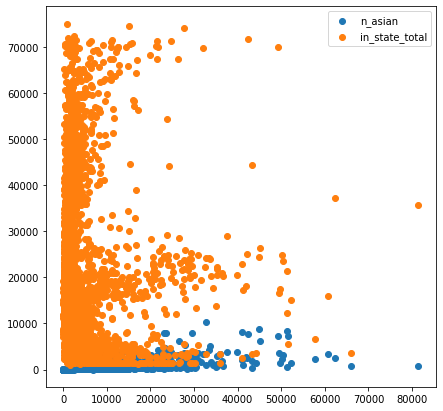

In [56]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.scatter(universities["total_enrollment"], universities["n_asian"], label = "n_asian")
ax.scatter(universities["total_enrollment"], universities["in_state_total"], label = "in_state_total")
plt.legend()

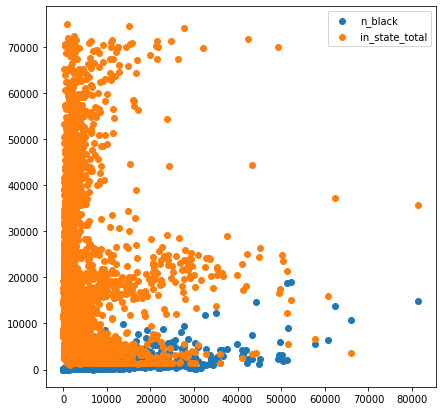

In [57]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.scatter(universities["total_enrollment"], universities["n_black"], label = "n_black")
ax.scatter(universities["total_enrollment"], universities["in_state_total"], label = "in_state_total")
plt.legend()

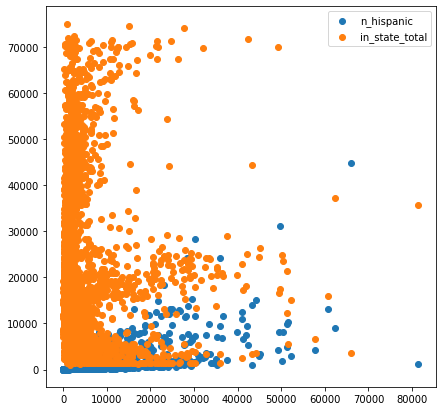

In [58]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.scatter(universities["total_enrollment"], universities["n_hispanic"], label = "n_hispanic")
ax.scatter(universities["total_enrollment"], universities["in_state_total"], label = "in_state_total")
plt.legend()

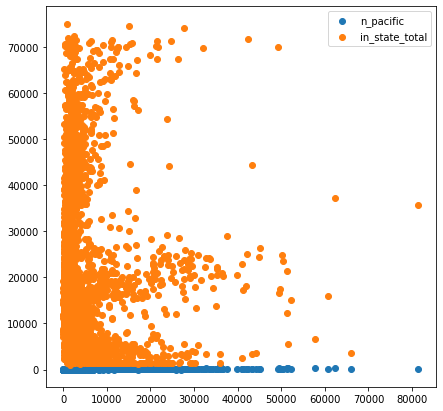

In [59]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.scatter(universities["total_enrollment"], universities["n_pacific"], label = "n_pacific")
ax.scatter(universities["total_enrollment"], universities["in_state_total"], label = "in_state_total")
plt.legend()

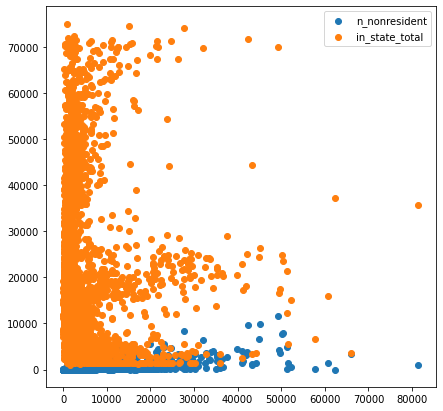

In [60]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.scatter(universities["total_enrollment"], universities["n_nonresident"], label = "n_nonresident")
ax.scatter(universities["total_enrollment"], universities["in_state_total"], label = "in_state_total")
plt.legend()

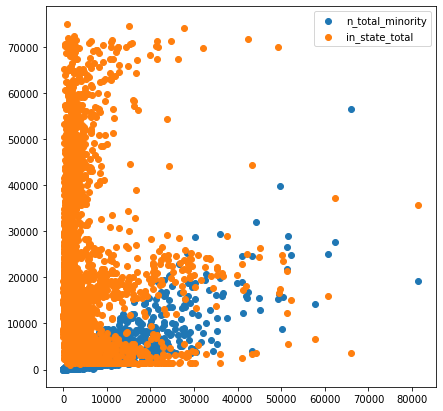

In [61]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.scatter(universities["total_enrollment"], universities["n_total_minority"], label = "n_total_minority")
ax.scatter(universities["total_enrollment"], universities["in_state_total"], label = "in_state_total")
plt.legend()

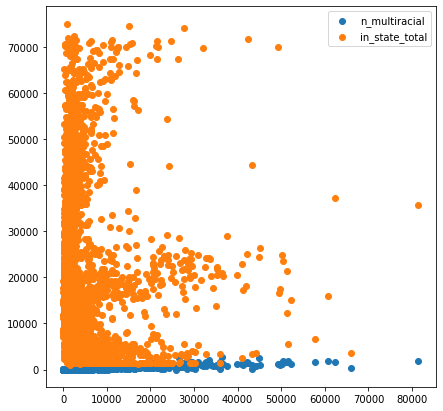

In [62]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.scatter(universities["total_enrollment"], universities["n_multiracial"], label = "n_multiracial")
ax.scatter(universities["total_enrollment"], universities["in_state_total"], label = "in_state_total")
plt.legend()

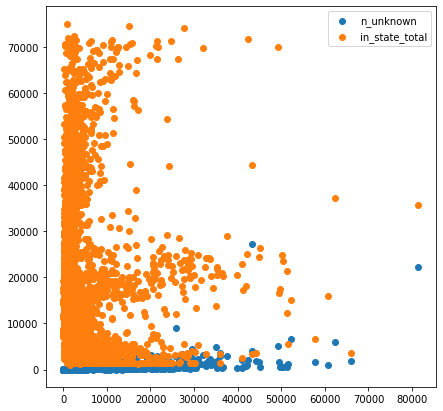

In [63]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.scatter(universities["total_enrollment"], universities["n_unknown"], label = "n_unknown")
ax.scatter(universities["total_enrollment"], universities["in_state_total"], label = "in_state_total")
plt.legend()

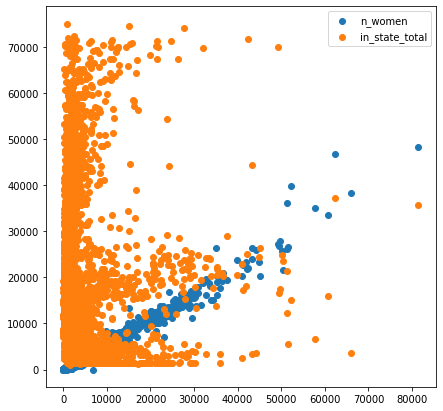

In [64]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.scatter(universities["total_enrollment"], universities["n_women"], label = "n_women")
ax.scatter(universities["total_enrollment"], universities["in_state_total"], label = "in_state_total")
plt.legend()

In [65]:
universities['type']=universities.type.replace({'Private':1,'Public':2,'For Profit':1}).astype(int) #Changed Public and Private to 1 and 2


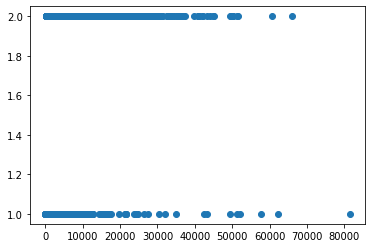

In [66]:

plt.scatter(universities['total_enrollment'],universities['type'])

From the above graph we can see that the enrollment rate is way higher in Public universities over private universities



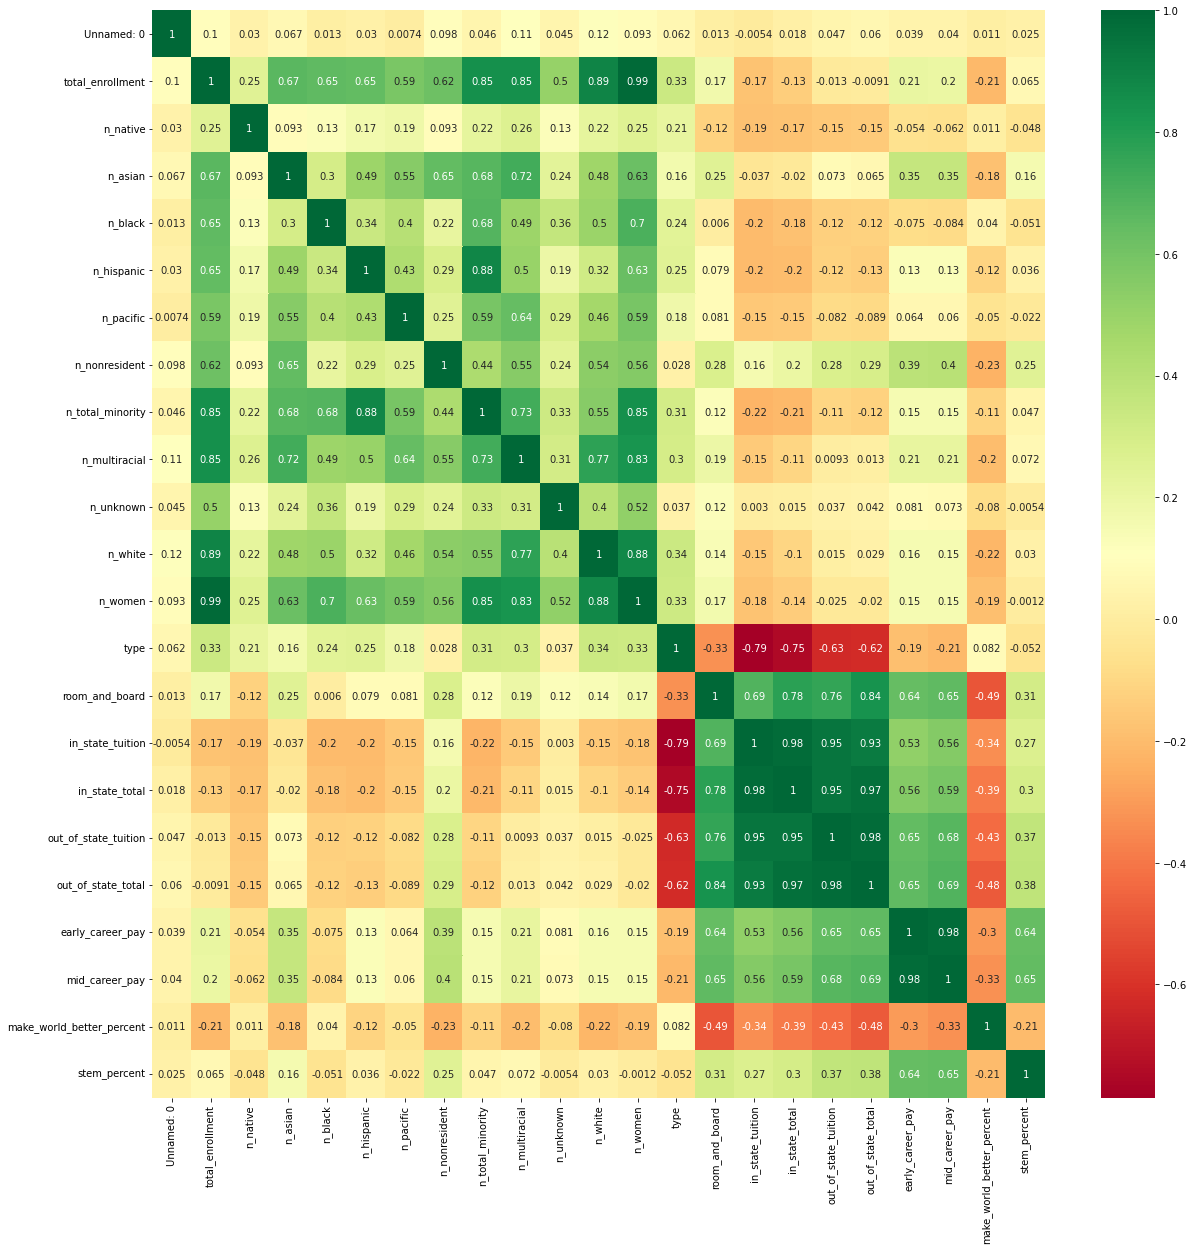

In [67]:
#get correlations of each features in dataset
corrmat = universities.corr(method='pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map 
g=sns.heatmap(universities[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [68]:
universities.corr()

Unnamed: 0  total_enrollment  n_native   n_asian   n_black  n_hispanic  n_pacific  n_nonresident  n_total_minority  n_multiracial  n_unknown   n_white   n_women      type  room_and_board  in_state_tuition  in_state_total  out_of_state_tuition  out_of_state_total  early_career_pay  mid_career_pay  make_world_better_percent  stem_percent
Unnamed: 0                   1.000000          0.099704  0.030408  0.067495  0.012887    0.029606   0.007403       0.098417          0.046060       0.109076   0.044852  0.118763  0.092531  0.062304        0.012724         -0.005409        0.017941              0.047089            0.059540          0.039023        0.040060                   0.011339      0.025336
total_enrollment             0.099704          1.000000  0.249211  0.669823  0.653198    0.646561   0.587251       0.618948          0.852336       0.846645   0.504815  0.890825  0.987445  0.334711        0.171972         -0.173386       -0.134604             -0.013326           -0.009055          0.205583        0.204651                  -0.208794      0.065371
n_native                     0.030408          0.249211  1.000000  0.093130  0.125547    0.167135   0.189720       0.092686          0.223433       0.263438   0.126953  0.222907  0.253709  0.214253       -0.122136         -0.185793       -0.171996             -0.154883           -0.145757         -0.054110       -0.062069                   0.011091     -0.048425
n_asian                      0.067495          0.669823  0.093130  1.000000  0.296415    0.488880   0.549872       0.645325          0.678879       0.724802   0.238080  0.477391  0.626594  0.163645        0.251129         -0.036967       -0.019975              0.073208            0.064828          0.351709        0.354513                  -0.184880      0.158327
n_black                      0.012887          0.653198  0.125547  0.296415  1.000000    0.338451   0.402463       0.216909          0.682284       0.487012   0.360104  0.495177  0.704365  0.241602        0.006024         -0.200463       -0.183033             -0.123217           -0.121438         -0.074973       -0.084342                   0.039819     -0.050784
n_hispanic                   0.029606          0.646561  0.167135  0.488880  0.338451    1.000000   0.433169       0.287045          0.883848       0.500818   0.192195  0.321498  0.631173  0.252876        0.079224         -0.200860       -0.197453             -0.118976           -0.133561          0.128616        0.133882                  -0.115596      0.036200
n_pacific                    0.007403          0.587251  0.189720  0.549872  0.402463    0.433169   1.000000       0.247452          0.590989       0.641192   0.288370  0.463500  0.589638  0.181711        0.081351         -0.154465       -0.145676             -0.082366           -0.089138          0.064275        0.059688                  -0.050392     -0.021837
n_nonresident                0.098417          0.618948  0.092686  0.645325  0.216909    0.287045   0.247452       1.000000          0.436332       0.549367   0.243489  0.536864  0.558708  0.027874        0.275191          0.162287        0.199676              0.279896            0.289924          0.388715        0.396424                  -0.229720      0.252749
n_total_minority             0.046060          0.852336  0.223433  0.678879  0.682284    0.883848   0.590989       0.436332          1.000000       0.725666   0.329908  0.547698  0.851477  0.308586        0.121669         -0.222846       -0.207496             -0.108200           -0.117693          0.150490        0.149990                  -0.111739      0.046759
n_multiracial                0.109076          0.846645  0.263438  0.724802  0.487012    0.500818   0.641192       0.549367          0.725666       1.000000   0.307413  0.771112  0.825840  0.295715        0.190906         -0.145266       -0.108294              0.009312            0.012702          0.214026        0.214026                  -0.197905      0.071719
n_unknown   

In [69]:
universities.columns

Index(['Unnamed: 0', 'name', 'total_enrollment', 'state', 'n_native', 'n_asian', 'n_black', 'n_hispanic', 'n_pacific', 'n_nonresident', 'n_total_minority', 'n_multiracial', 'n_unknown', 'n_white', 'n_women', 'state_code', 'type', 'degree_length', 'room_and_board', 'in_state_tuition', 'in_state_total', 'out_of_state_tuition', 'out_of_state_total', 'early_career_pay', 'mid_career_pay', 'make_world_better_percent', 'stem_percent'], dtype='object')

In [73]:
corr = universities[["in_state_tuition","out_of_state_tuition","out_of_state_total"]]

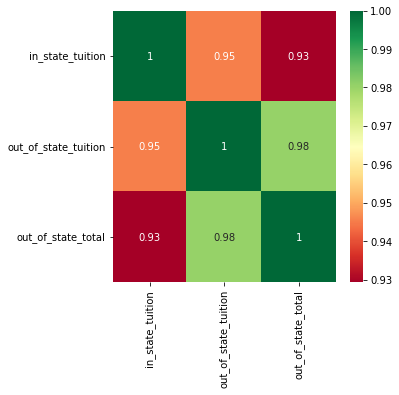

In [75]:
#get correlations of each features in dataset
corrmat = corr.corr(method='pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
#plot heat map 
g=sns.heatmap(universities[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [76]:
min(universities.corr())

'Unnamed: 0'

In [77]:
max(universities.corr())

'type'

In [78]:
universities.head()

Unnamed: 0                                  name  total_enrollment       state  n_native  n_asian  n_black  n_hispanic  n_pacific  n_nonresident  n_total_minority  n_multiracial  n_unknown  n_white  n_women state_code  type degree_length  room_and_board  in_state_tuition  in_state_total  out_of_state_tuition  out_of_state_total  early_career_pay  mid_career_pay  make_world_better_percent  stem_percent
0           0                Aaniiih Nakoda College               291     Montana       256        0        0           2          0              0               258              0          0       33      178         MT     2        2 Year             NaN              2380            2380                  2380                2380               NaN             NaN                        NaN           NaN
1           1          Abilene Christian University              4427       Texas        18       46      387         582          0            185              1212            179         71     2959     2562         TX     1        4 Year         10350.0             34850           45200                 34850               45200               NaN             NaN                        NaN           NaN
2           2  Abraham Baldwin Agricultural College              3458     Georgia         9       36      407         197          1             49               680             30          1     2728     1822         GA     2        2 Year          8474.0              4128           12602                 12550               21024               NaN             NaN                        NaN           NaN
3           3                       Academy College               127   Minnesota         1       10       14           6          3              0                35              1         12       80       28         MN     1        2 Year             NaN             17661           17661                 17661               17661               NaN             NaN                        NaN           NaN
4           4             Academy of Art University             15212  California        70     1092      999        1383         75           5173              3931            312       2652     3456     8815         CA     1        4 Year         16648.0             27810           44458                 27810               44458               NaN             NaN                        NaN           NaN

In [79]:
feature_add = universities

In [80]:
feature_add["avg_non_native"] = (feature_add["n_asian"]+feature_add["n_black"]+feature_add["n_hispanic"]+feature_add["n_pacific"]+feature_add["n_nonresident"])/5

In [81]:
feature_add["avg_non_native"].head()

0       0.4
1     240.0
2     138.0
3       6.6
4    1744.4
Name: avg_non_native, dtype: float64

In [82]:
feature_add["remaining_state_total"] = (feature_add["in_state_total"] - feature_add["in_state_tuition"])

In [83]:
feature_add["remaining_state_total"].head()

0        0
1    10350
2     8474
3        0
4    16648
Name: remaining_state_total, dtype: int64

2. 

In [84]:
feature_add[["in_state_total","avg_non_native"]].corr()

in_state_total  avg_non_native
in_state_total        1.000000       -0.147809
avg_non_native       -0.147809        1.000000

In [85]:
feature_add[["in_state_total","remaining_state_total"]].corr()

in_state_total  remaining_state_total
in_state_total               1.000000               0.841737
remaining_state_total        0.841737               1.000000

In [86]:
feature_add[["avg_non_native","n_asian","n_black","n_hispanic","n_pacific","n_nonresident"]].corr()

avg_non_native   n_asian   n_black  n_hispanic  n_pacific  n_nonresident
avg_non_native        1.000000  0.722118  0.658856    0.863609   0.564075       0.569329
n_asian               0.722118  1.000000  0.296415    0.488880   0.549872       0.645325
n_black               0.658856  0.296415  1.000000    0.338451   0.402463       0.216909
n_hispanic            0.863609  0.488880  0.338451    1.000000   0.433169       0.287045
n_pacific             0.564075  0.549872  0.402463    0.433169   1.000000       0.247452
n_nonresident         0.569329  0.645325  0.216909    0.287045   0.247452       1.000000

In [87]:
feat_corr = feature_add[["in_state_total","avg_non_native","remaining_state_total"]].corr()

In [88]:
sorted_mat = feat_corr.unstack().sort_values(ascending = False)
print(sorted_mat)

remaining_state_total  remaining_state_total    1.000000
avg_non_native         avg_non_native           1.000000
in_state_total         in_state_total           1.000000
remaining_state_total  in_state_total           0.841737
in_state_total         remaining_state_total    0.841737
remaining_state_total  avg_non_native          -0.063418
avg_non_native         remaining_state_total   -0.063418
                       in_state_total          -0.147809
in_state_total         avg_non_native          -0.147809
dtype: float64


In [89]:
tution_income.head()

name state  total_price  year     campus     net_cost         income_lvl
0  Piedmont International University    NC        20174  2016  On Campus  11475.00000        0 to 30,000
1  Piedmont International University    NC        20174  2016  On Campus  11451.00000   30,001 to 48,000
2  Piedmont International University    NC        20174  2016  On Campus  16229.00000   48_001 to 75,000
3  Piedmont International University    NC        20174  2016  On Campus  15592.00000  75,001 to 110,000
4  Piedmont International University    NC        20514  2017  On Campus  11668.39249        0 to 30,000

In [90]:
feature_add.head()

Unnamed: 0                                  name  total_enrollment       state  n_native  n_asian  n_black  n_hispanic  n_pacific  n_nonresident  n_total_minority  n_multiracial  n_unknown  n_white  n_women state_code  type degree_length  room_and_board  in_state_tuition  in_state_total  out_of_state_tuition  out_of_state_total  early_career_pay  mid_career_pay  make_world_better_percent  stem_percent  avg_non_native  remaining_state_total
0           0                Aaniiih Nakoda College               291     Montana       256        0        0           2          0              0               258              0          0       33      178         MT     2        2 Year             NaN              2380            2380                  2380                2380               NaN             NaN                        NaN           NaN             0.4                      0
1           1          Abilene Christian University              4427       Texas        18       46      387         582          0            185              1212            179         71     2959     2562         TX     1        4 Year         10350.0             34850           45200                 34850               45200               NaN             NaN                        NaN           NaN           240.0                  10350
2           2  Abraham Baldwin Agricultural College              3458     Georgia         9       36      407         197          1             49               680             30          1     2728     1822         GA     2        2 Year          8474.0              4128           12602                 12550               21024               NaN             NaN                        NaN           NaN           138.0                   8474
3           3                       Academy College               127   Minnesota         1       10       14           6          3              0                35              1         12       80       28         MN     1        2 Year             NaN             17661           17661                 17661               17661               NaN             NaN                        NaN           NaN             6.6                      0
4           4             Academy of Art University             15212  California        70     1092      999        1383         75           5173              3931            312       2652     3456     8815         CA     1        4 Year         16648.0             27810           44458                 27810               44458               NaN             NaN                        NaN           NaN          1744.4                  16648

In [91]:
len(tution_income)

209012

In [92]:
tution_income.columns

Index(['name', 'state', 'total_price', 'year', 'campus', 'net_cost', 'income_lvl'], dtype='object')

In [93]:
feature_add.columns

Index(['Unnamed: 0', 'name', 'total_enrollment', 'state', 'n_native', 'n_asian', 'n_black', 'n_hispanic', 'n_pacific', 'n_nonresident', 'n_total_minority', 'n_multiracial', 'n_unknown', 'n_white', 'n_women', 'state_code', 'type', 'degree_length', 'room_and_board', 'in_state_tuition', 'in_state_total', 'out_of_state_tuition', 'out_of_state_total', 'early_career_pay', 'mid_career_pay', 'make_world_better_percent', 'stem_percent', 'avg_non_native', 'remaining_state_total'], dtype='object')

In [94]:
type(feature_add["state"])

pandas.core.series.Series

In [95]:
uni_name = set(tution_income["name"])
uni_avg_total_price = pd.DataFrame(columns=["name", "avg_total_price"])
for name in uni_name:
  avg_total_price = np.mean(tution_income["total_price"].loc[tution_income["name"] == name])
  uni_avg_total_price = uni_avg_total_price.append({"name":name,"avg_total_price":avg_total_price}, ignore_index = True)

In [96]:
feature_add = feature_add.merge(uni_avg_total_price,how = "left", on = "name")

In [97]:
feature_add.head()

Unnamed: 0                                  name  total_enrollment       state  n_native  n_asian  n_black  n_hispanic  n_pacific  n_nonresident  n_total_minority  n_multiracial  n_unknown  n_white  n_women state_code  type degree_length  room_and_board  in_state_tuition  in_state_total  out_of_state_tuition  out_of_state_total  early_career_pay  mid_career_pay  make_world_better_percent  stem_percent  avg_non_native  remaining_state_total  avg_total_price
0           0                Aaniiih Nakoda College               291     Montana       256        0        0           2          0              0               258              0          0       33      178         MT     2        2 Year             NaN              2380            2380                  2380                2380               NaN             NaN                        NaN           NaN             0.4                      0     17030.000000
1           1          Abilene Christian University              4427       Texas        18       46      387         582          0            185              1212            179         71     2959     2562         TX     1        4 Year         10350.0             34850           45200                 34850               45200               NaN             NaN                        NaN           NaN           240.0                  10350     44355.600000
2           2  Abraham Baldwin Agricultural College              3458     Georgia         9       36      407         197          1             49               680             30          1     2728     1822         GA     2        2 Year          8474.0              4128           12602                 12550               21024               NaN             NaN                        NaN           NaN           138.0                   8474     14635.500000
3           3                       Academy College               127   Minnesota         1       10       14           6          3              0                35              1         12       80       28         MN     1        2 Year             NaN             17661           17661                 17661               17661               NaN             NaN                        NaN           NaN             6.6                      0     34981.760000
4           4             Academy of Art University             15212  California        70     1092      999        1383         75           5173              3931            312       2652     3456     8815         CA     1        4 Year         16648.0             27810           44458                 27810               44458               NaN             NaN                        NaN           NaN          1744.4                  16648     38655.058824

In [98]:
feature_add[["in_state_total", "avg_total_price"]].corr()

in_state_total  avg_total_price
in_state_total         1.000000         0.960851
avg_total_price        0.960851         1.000000

In [99]:
feature_add.corr()

Unnamed: 0  total_enrollment  n_native   n_asian   n_black  n_hispanic  n_pacific  n_nonresident  n_total_minority  n_multiracial  n_unknown   n_white   n_women      type  room_and_board  in_state_tuition  in_state_total  out_of_state_tuition  out_of_state_total  early_career_pay  mid_career_pay  make_world_better_percent  stem_percent  avg_non_native  remaining_state_total  avg_total_price
Unnamed: 0                   1.000000          0.099704  0.030408  0.067495  0.012887    0.029606   0.007403       0.098417          0.046060       0.109076   0.044852  0.118763  0.092531  0.062304        0.012724         -0.005409        0.017941              0.047089            0.059540          0.039023        0.040060                   0.011339      0.025336        0.054472               0.080137        -0.000240
total_enrollment             0.099704          1.000000  0.249211  0.669823  0.653198    0.646561   0.587251       0.618948          0.852336       0.846645   0.504815  0.890825  0.987445  0.334711        0.171972         -0.173386       -0.134604             -0.013326           -0.009055          0.205583        0.204651                  -0.208794      0.065371        0.870011               0.003275        -0.131756
n_native                     0.030408          0.249211  1.000000  0.093130  0.125547    0.167135   0.189720       0.092686          0.223433       0.263438   0.126953  0.222907  0.253709  0.214253       -0.122136         -0.185793       -0.171996             -0.154883           -0.145757         -0.054110       -0.062069                   0.011091     -0.048425        0.180779              -0.096842        -0.186680
n_asian                      0.067495          0.669823  0.093130  1.000000  0.296415    0.488880   0.549872       0.645325          0.678879       0.724802   0.238080  0.477391  0.626594  0.163645        0.251129         -0.036967       -0.019975              0.073208            0.064828          0.351709        0.354513                  -0.184880      0.158327        0.722118               0.032234         0.024671
n_black                      0.012887          0.653198  0.125547  0.296415  1.000000    0.338451   0.402463       0.216909          0.682284       0.487012   0.360104  0.495177  0.704365  0.241602        0.006024         -0.200463       -0.183033             -0.123217           -0.121438         -0.074973       -0.084342                   0.039819     -0.050784        0.658856              -0.095293        -0.179350
n_hispanic                   0.029606          0.646561  0.167135  0.488880  0.338451    1.000000   0.433169       0.287045          0.883848       0.500818   0.192195  0.321498  0.631173  0.252876        0.079224         -0.200860       -0.197453             -0.118976           -0.133561          0.128616        0.133882                  -0.115596      0.036200        0.863609              -0.146295        -0.141136
n_pacific                    0.007403          0.587251  0.189720  0.549872  0.402463    0.433169   1.000000       0.247452          0.590989       0.641192   0.288370  0.463500  0.589638  0.181711        0.081351         -0.154465       -0.145676             -0.082366           -0.089138          0.064275        0.059688                  -0.050392     -0.021837        0.564075              -0.090206        -0.115675
n_nonresident                0.098417          0.618948  0.092686  0.645325  0.216909    0.287045   0.247452       1.000000          0.436332       0.549367   0.243489  0.536864  0.558708  0.027874        0.275191          0.162287        0.199676              0.279896            0.289924          0.388715        0.396424                  -0.229720      0.252749        0.569329               0.263309         0.212434
n_total_minority             0.046060          0.852336  0.223433  0.678879  0.682284    0.883848   0.590989       0.436332          1.000000       0.725666   0.329908  0.547698  0.851477  0.308586        0.121669         -0.222846       

In [100]:
feature_add[["make_world_better_percent","avg_non_native","remaining_state_total","avg_total_price"]].corr()

make_world_better_percent  avg_non_native  remaining_state_total  avg_total_price
make_world_better_percent                   1.000000       -0.148053              -0.524294        -0.353793
avg_non_native                             -0.148053        1.000000              -0.063418        -0.107657
remaining_state_total                      -0.524294       -0.063418               1.000000         0.731139
avg_total_price                            -0.353793       -0.107657               0.731139         1.000000

In [101]:
feature_add.isna().sum()

Unnamed: 0                      0
name                            0
total_enrollment                0
state                           0
n_native                        0
n_asian                         0
n_black                         0
n_hispanic                      0
n_pacific                       0
n_nonresident                   0
n_total_minority                0
n_multiracial                   0
n_unknown                       0
n_white                         0
n_women                         0
state_code                      0
type                            0
degree_length                   0
room_and_board                763
in_state_tuition                0
in_state_total                  0
out_of_state_tuition            0
out_of_state_total              0
early_career_pay             1519
mid_career_pay               1519
make_world_better_percent    1536
stem_percent                 1519
avg_non_native                  0
remaining_state_total           0
avg_total_pric

In [102]:
feature_add.isna().sum()

Unnamed: 0                      0
name                            0
total_enrollment                0
state                           0
n_native                        0
n_asian                         0
n_black                         0
n_hispanic                      0
n_pacific                       0
n_nonresident                   0
n_total_minority                0
n_multiracial                   0
n_unknown                       0
n_white                         0
n_women                         0
state_code                      0
type                            0
degree_length                   0
room_and_board                763
in_state_tuition                0
in_state_total                  0
out_of_state_tuition            0
out_of_state_total              0
early_career_pay             1519
mid_career_pay               1519
make_world_better_percent    1536
stem_percent                 1519
avg_non_native                  0
remaining_state_total           0
avg_total_pric

In [103]:
feature_add[["in_state_total", "room_and_board"]].corr()

in_state_total  room_and_board
in_state_total        1.000000        0.776867
room_and_board        0.776867        1.000000

In [104]:
feature_add[["in_state_total", "early_career_pay"]].corr()

in_state_total  early_career_pay
in_state_total          1.000000          0.555932
early_career_pay        0.555932          1.000000

In [105]:
feature_add[["in_state_total", "mid_career_pay"]].corr()

in_state_total  mid_career_pay
in_state_total        1.000000        0.589835
mid_career_pay        0.589835        1.000000

In [106]:
feature_add[["in_state_total", "make_world_better_percent"]].corr()

in_state_total  make_world_better_percent
in_state_total                   1.000000                  -0.393676
make_world_better_percent       -0.393676                   1.000000

In [107]:
feature_add[["in_state_total", "stem_percent"]].corr()

in_state_total  stem_percent
in_state_total        1.000000      0.297527
stem_percent          0.297527      1.000000

In [108]:
feature_add[["in_state_total", "avg_total_price"]].corr()

in_state_total  avg_total_price
in_state_total         1.000000         0.960851
avg_total_price        0.960851         1.000000

In [109]:
handling_missing_values = feature_add


In [110]:
handling_missing_values = handling_missing_values.drop(["make_world_better_percent", "stem_percent"], axis = 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


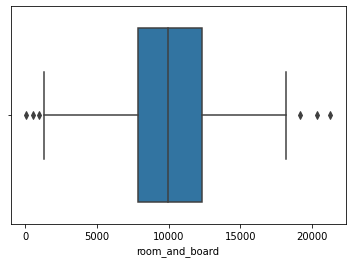

In [111]:
sns.boxplot(handling_missing_values.room_and_board)

In [112]:
handling_missing_values["room_and_board"] = handling_missing_values["room_and_board"].fillna(handling_missing_values["room_and_board"].mean())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


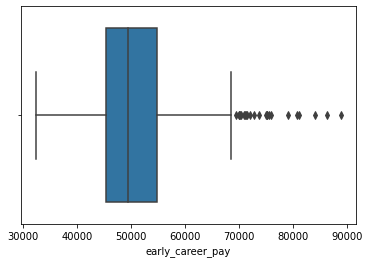

In [113]:
sns.boxplot(handling_missing_values.early_career_pay)

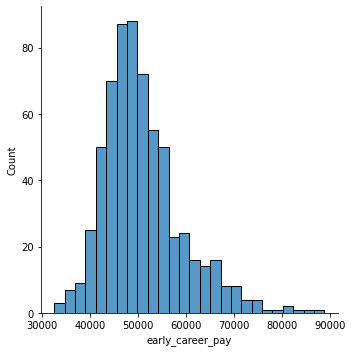

In [114]:
sns.displot(handling_missing_values.early_career_pay)

In [115]:
handling_missing_values["early_career_pay"] = handling_missing_values["early_career_pay"].fillna(handling_missing_values["early_career_pay"].median())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


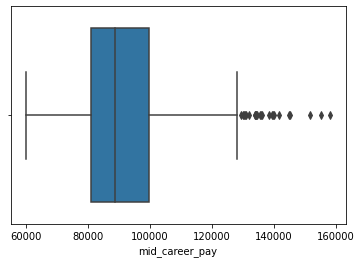

In [116]:
sns.boxplot(handling_missing_values.mid_career_pay)

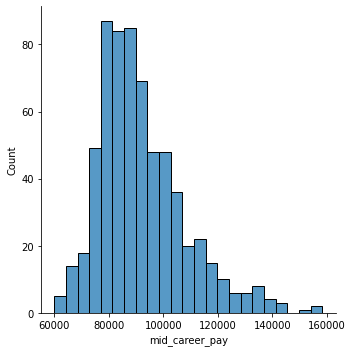

In [117]:
sns.displot(handling_missing_values.mid_career_pay)

In [118]:
handling_missing_values["mid_career_pay"] = handling_missing_values["mid_career_pay"].fillna(handling_missing_values["mid_career_pay"].median())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


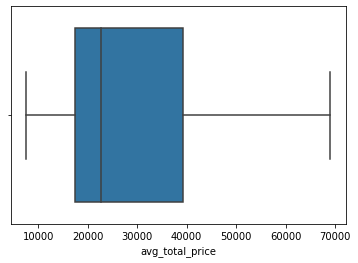

In [119]:
sns.boxplot(handling_missing_values.avg_total_price)

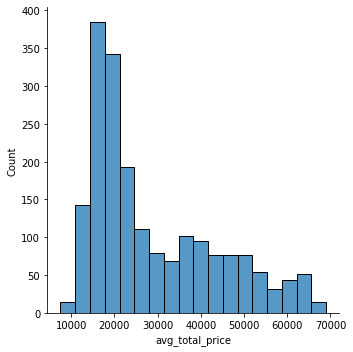

In [120]:
sns.displot(handling_missing_values.avg_total_price)

In [121]:
handling_missing_values["avg_total_price"] = handling_missing_values["avg_total_price"].fillna(handling_missing_values["avg_total_price"].mean())

In [122]:
handling_missing_values.head()

Unnamed: 0                                  name  total_enrollment       state  n_native  n_asian  n_black  n_hispanic  n_pacific  n_nonresident  n_total_minority  n_multiracial  n_unknown  n_white  n_women state_code  type degree_length  room_and_board  in_state_tuition  in_state_total  out_of_state_tuition  out_of_state_total  early_career_pay  mid_career_pay  avg_non_native  remaining_state_total  avg_total_price
0           0                Aaniiih Nakoda College               291     Montana       256        0        0           2          0              0               258              0          0       33      178         MT     2        2 Year    10053.608166              2380            2380                  2380                2380           49400.0         88750.0             0.4                      0     17030.000000
1           1          Abilene Christian University              4427       Texas        18       46      387         582          0            185              1212            179         71     2959     2562         TX     1        4 Year    10350.000000             34850           45200                 34850               45200           49400.0         88750.0           240.0                  10350     44355.600000
2           2  Abraham Baldwin Agricultural College              3458     Georgia         9       36      407         197          1             49               680             30          1     2728     1822         GA     2        2 Year     8474.000000              4128           12602                 12550               21024           49400.0         88750.0           138.0                   8474     14635.500000
3           3                       Academy College               127   Minnesota         1       10       14           6          3              0                35              1         12       80       28         MN     1        2 Year    10053.608166             17661           17661                 17661               17661           49400.0         88750.0             6.6                      0     34981.760000
4           4             Academy of Art University             15212  California        70     1092      999        1383         75           5173              3931            312       2652     3456     8815         CA     1        4 Year    16648.000000             27810           44458                 27810               44458           49400.0         88750.0          1744.4                  16648     38655.058824

In [123]:
handling_missing_values.isna().sum()

Unnamed: 0               0
name                     0
total_enrollment         0
state                    0
n_native                 0
n_asian                  0
n_black                  0
n_hispanic               0
n_pacific                0
n_nonresident            0
n_total_minority         0
n_multiracial            0
n_unknown                0
n_white                  0
n_women                  0
state_code               0
type                     0
degree_length            0
room_and_board           0
in_state_tuition         0
in_state_total           0
out_of_state_tuition     0
out_of_state_total       0
early_career_pay         0
mid_career_pay           0
avg_non_native           0
remaining_state_total    0
avg_total_price          0
dtype: int64

4. 

In [124]:
from sklearn.preprocessing import OneHotEncoder
ohne = OneHotEncoder(sparse = False)

In [125]:
ohne.fit_transform(universities[["degree_length"]])

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [126]:
ohne.categories_

[array(['2 Year', '4 Year'], dtype=object)]

In [127]:
len(handling_missing_values)

2159

In [128]:
from sklearn.model_selection import train_test_split
X1 = handling_missing_values.drop(["degree_length"], axis = 1)
y1 = handling_missing_values["degree_length"]
x1_train, x1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = 0.3, random_state = 0, stratify = y)

In [129]:
x1_train["degree_length"] = y1_train
x1_test["degree_length"] = y1_test

In [130]:
train1 = x1_train
test1 = x1_test

In [131]:
(train1["degree_length"].value_counts())/len(train1)*100

4 Year    60.026473
2 Year    39.973527
Name: degree_length, dtype: float64

In [132]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()


In [133]:
handling_missing_values.columns

Index(['Unnamed: 0', 'name', 'total_enrollment', 'state', 'n_native', 'n_asian', 'n_black', 'n_hispanic', 'n_pacific', 'n_nonresident', 'n_total_minority', 'n_multiracial', 'n_unknown', 'n_white', 'n_women', 'state_code', 'type', 'degree_length', 'room_and_board', 'in_state_tuition', 'in_state_total', 'out_of_state_tuition', 'out_of_state_total', 'early_career_pay', 'mid_career_pay', 'avg_non_native', 'remaining_state_total', 'avg_total_price'], dtype='object')

In [134]:
scale_data = handling_missing_values[["total_enrollment","n_native","n_black","n_hispanic","n_pacific","n_nonresident","n_total_minority","n_multiracial","n_unknown","n_white","n_women","degree_length","room_and_board","room_and_board","in_state_tuition","in_state_total","out_of_state_tuition","out_of_state_total","early_career_pay","mid_career_pay","avg_non_native","remaining_state_total","avg_total_price"]]

In [135]:
scale_data["degree_length"] = ohne.fit_transform(scale_data[["degree_length"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [136]:
ohne.categories_

[array(['2 Year', '4 Year'], dtype=object)]

In [137]:
len(scale_data)

2159

In [138]:
scale_data.columns

Index(['total_enrollment', 'n_native', 'n_black', 'n_hispanic', 'n_pacific', 'n_nonresident', 'n_total_minority', 'n_multiracial', 'n_unknown', 'n_white', 'n_women', 'degree_length', 'room_and_board', 'room_and_board', 'in_state_tuition', 'in_state_total', 'out_of_state_tuition', 'out_of_state_total', 'early_career_pay', 'mid_career_pay', 'avg_non_native', 'remaining_state_total', 'avg_total_price'], dtype='object')

In [139]:
scalecd_data_real = min_max_scaler.fit_transform(scale_data)

In [140]:
cols = ['total_enrollment', 'n_native', 'n_black', 'n_hispanic', 'n_pacific', 'n_nonresident', 'n_total_minority', 'n_multiracial', 'n_unknown', 'n_white', 'n_women', 'degree_length', 'room_and_board', 'room_and_board', 'in_state_tuition', 'in_state_total', 'out_of_state_tuition', 'out_of_state_total', 'early_career_pay', 'mid_career_pay', 'avg_non_native', 'remaining_state_total', 'avg_total_price']

In [141]:
scalecd_data_real = pd.DataFrame(scalecd_data_real, columns = cols)

In [142]:
scalecd_data_real.head()

total_enrollment  n_native   n_black  n_hispanic  n_pacific  n_nonresident  n_total_minority  n_multiracial  n_unknown   n_white   n_women  degree_length  room_and_board  room_and_board  in_state_tuition  in_state_total  out_of_state_tuition  out_of_state_total  early_career_pay  mid_career_pay  avg_non_native  remaining_state_total  avg_total_price
0          0.003389  0.096277  0.000000    0.000045   0.000000       0.000000          0.004561       0.000000   0.000000  0.000788  0.003683            1.0        0.471256        0.471256          0.031930        0.019152              0.031930            0.013636          0.300178        0.292049        0.000034               0.000000         0.154364
1          0.054172  0.006769  0.020461    0.012971   0.000000       0.016094          0.021428       0.063906   0.002609  0.070624  0.053012            0.0        0.485190        0.485190          0.577599        0.597480              0.577599            0.595216          0.300178        0.292049        0.020109               0.485915         0.598951
2          0.042274  0.003385  0.021518    0.004390   0.001531       0.004263          0.012022       0.010710   0.000037  0.065111  0.037700            1.0        0.396991        0.396991          0.061306        0.157210              0.202840            0.266859          0.300178        0.292049        0.011562               0.397840         0.115405
3          0.001375  0.000376  0.000740    0.000134   0.004594       0.000000          0.000619       0.000357   0.000441  0.001909  0.000579            1.0        0.471256        0.471256          0.288732        0.225537              0.288732            0.221182          0.300178        0.292049        0.000553               0.000000         0.446439
4          0.186594  0.026326  0.052818    0.030822   0.114855       0.450022          0.069500       0.111389   0.097453  0.082486  0.182396            0.0        0.781288        0.781288          0.459289        0.587458              0.459289            0.585139          0.300178        0.292049        0.146156               0.781596         0.506203

In [143]:
from sklearn.model_selection import train_test_split
scaled_X = scalecd_data_real.drop(["in_state_total"], axis = 1)
scaled_y = scalecd_data_real["in_state_total"]
scaled_x_train, scaled_x_test, scaled_y_train, scaled_y_test = train_test_split(scaled_X,scaled_y, test_size = 0.3, random_state = 0, stratify = y)

In [144]:
scaled_x_train["in_state_total"] = scaled_y_train
scaled_x_test["in_state_total"] = scaled_y_test

In [145]:
scaled_train = scaled_x_train
scaled_test = scaled_x_test

In [146]:
scaled_x_train.head()

total_enrollment  n_native   n_black  n_hispanic  n_pacific  n_nonresident  n_total_minority  n_multiracial  n_unknown   n_white   n_women  degree_length  room_and_board  room_and_board  in_state_tuition  out_of_state_tuition  out_of_state_total  early_career_pay  mid_career_pay  avg_non_native  remaining_state_total  avg_total_price  in_state_total
965           0.079392  0.006017  0.054668    0.055204   0.000000       0.005394          0.065310       0.032488   0.003124  0.063010  0.061909            1.0        0.471256        0.471256          0.036350              0.081220            0.053472          0.300178        0.292049        0.061147               0.000000         0.150047        0.022704
2013          0.030573  0.001504  0.003912    0.000869   0.003063       0.000174          0.003200       0.016423   0.000220  0.055277  0.030665            1.0        0.471256        0.471256          0.071086              0.170708            0.125796          0.300178        0.292049        0.002229               0.000000         0.097784        0.050621
497           0.048708  0.004137  0.069790    0.002318   0.007657       0.000435          0.026856       0.018922   0.000661  0.058237  0.045687            1.0        0.471256        0.471256          0.071086              0.160121            0.117240          0.300178        0.292049        0.024465               0.000000         0.145773        0.050621
782           0.049175  0.008650  0.013588    0.019300   0.016845       0.001131          0.023002       0.039629   0.001360  0.063702  0.049908            1.0        0.179596        0.179596          0.041845              0.061171            0.089560          0.300178        0.292049        0.019773               0.180751         0.130169        0.079118
1184          0.048524  0.001504  0.012213    0.004101   0.010720       0.032971          0.010891       0.027133   0.023445  0.055707  0.035113            0.0        0.554302        0.554302          0.219897              0.219897            0.326090          0.300178        0.292049        0.015333               0.554930         0.302014        0.329858

In [147]:
scaled_y_train.head()

965     0.022704
2013    0.050621
497     0.050621
782     0.079118
1184    0.329858
Name: in_state_total, dtype: float64

In [148]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
feature_scaled_y_train = lab_enc.fit_transform(scaled_y_train)


In [149]:
from sklearn.ensemble import RandomForestClassifier 
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(scaled_x_train,feature_scaled_y_train)

RandomForestClassifier()

In [150]:
 print(model.feature_importances_)

[0.04526814 0.04552212 0.04932156 0.04999052 0.03799538 0.0457765
 0.04591541 0.04400955 0.0495044  0.05058845 0.04566315 0.00488329
 0.03393474 0.03526579 0.06412467 0.05325602 0.05243563 0.02424817
 0.02468859 0.04764562 0.03363466 0.0528814  0.06344624]


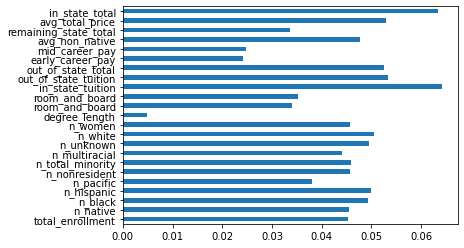

In [151]:
feat_importances = pd.Series(model.feature_importances_, index=scaled_x_train.columns) 
feat_importances.plot(kind='barh')
plt.show()
 

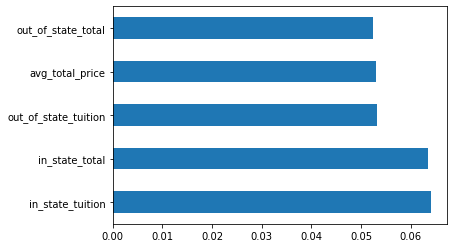

In [152]:
#printing the 5 largest features
feat_importances = pd.Series(model.feature_importances_, index=scaled_x_train.columns) 
feat_importances.nlargest(5).plot(kind='barh')
plt.show()
 

In [153]:
test.head()

Unnamed: 0                                       name  total_enrollment     state  n_native  n_asian  n_black  n_hispanic  n_pacific  n_nonresident  n_total_minority  n_multiracial  n_unknown  n_white  n_women state_code     type  room_and_board  in_state_tuition  in_state_total  out_of_state_tuition  out_of_state_total  early_career_pay  mid_career_pay  make_world_better_percent  stem_percent degree_length
363          363             Cloud County Community College              2439    Kansas         7       17      185          56         12             44               457            180         63     1875     1516         KS   Public          5900.0              3030            8930                  3470                9370               NaN             NaN                        NaN           NaN        2 Year
1045        1045                          Manhattan College              3970  New York         7      151      138         701          0            135              1069             72        645     2121     1791         NY  Private         16200.0             43480           59680                 43480               59680           64000.0        125700.0                       46.0          40.0        4 Year
1966        1966              University of Texas at Austin             51313     Texas        96     8324     1961        9836         59           4863             21852           1576        530    24068    26064         TX   Public         10804.0             10606           21410                 37480               48284               NaN             NaN                        NaN           NaN        4 Year
1000        1000                              Loras College              1569      Iowa         1       13       39          89          2             28               166             22         70     1305      752         IA  Private          8275.0             34184           42459                 34184               42459           48000.0         90100.0                       56.0          14.0        4 Year
164          164  Big Sandy Community and Technical College              4638  Kentucky         7        8       29          28          0              4               100             28        265     4269     2244         KY   Public             NaN              5310            5310                 18000               18000               NaN             NaN                        NaN           NaN        2 Year

In [154]:
test = test.drop(["make_world_better_percent", "stem_percent"], axis = 1)

In [155]:
test["room_and_board"] = test["room_and_board"].fillna(test["room_and_board"].mean())

In [156]:
test["early_career_pay"] = test["early_career_pay"].fillna(test["early_career_pay"].median())

In [157]:
test["mid_career_pay"] = test["mid_career_pay"].fillna(test["mid_career_pay"].median())

In [158]:
test.isna().sum()

Unnamed: 0              0
name                    0
total_enrollment        0
state                   0
n_native                0
n_asian                 0
n_black                 0
n_hispanic              0
n_pacific               0
n_nonresident           0
n_total_minority        0
n_multiracial           0
n_unknown               0
n_white                 0
n_women                 0
state_code              0
type                    0
room_and_board          0
in_state_tuition        0
in_state_total          0
out_of_state_tuition    0
out_of_state_total      0
early_career_pay        0
mid_career_pay          0
degree_length           0
dtype: int64

In [159]:
len(test)

648

In [160]:
test_scale = test[["total_enrollment","n_native","n_black","n_hispanic","n_pacific","n_nonresident","n_total_minority","n_multiracial","n_unknown","n_white","n_women","degree_length","room_and_board","room_and_board","in_state_tuition","in_state_total","out_of_state_tuition","out_of_state_total","early_career_pay","mid_career_pay"]]

In [161]:
test_scale["degree_length"] = ohne.fit_transform(test_scale[["degree_length"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [162]:
scalecd_test_data = min_max_scaler.fit_transform(test_scale)

In [163]:
cols1 = ['total_enrollment', 'n_native', 'n_black', 'n_hispanic', 'n_pacific', 'n_nonresident', 'n_total_minority', 'n_multiracial', 'n_unknown', 'n_white', 'n_women', 'degree_length', 'room_and_board', 'room_and_board', 'in_state_tuition', 'in_state_total', 'out_of_state_tuition', 'out_of_state_total', 'early_career_pay', 'mid_career_pay']

In [164]:
scalecd_test_data = pd.DataFrame(scalecd_test_data,columns = cols1)

In [165]:
scalecd_test_data.head()

total_enrollment  n_native   n_black  n_hispanic  n_pacific  n_nonresident  n_total_minority  n_multiracial  n_unknown   n_white   n_women  degree_length  room_and_board  room_and_board  in_state_tuition  in_state_total  out_of_state_tuition  out_of_state_total  early_career_pay  mid_career_pay
0          0.046937  0.002633  0.009879    0.003051   0.029630       0.004417          0.017187       0.096618   0.007028  0.070846  0.041976            1.0        0.287398        0.287398          0.045149        0.105296              0.052939            0.107920          0.250471        0.261752
1          0.076793  0.002633  0.007369    0.038187   0.000000       0.013553          0.040203       0.038647   0.071954  0.080141  0.049590            0.0        0.839263        0.839263          0.761331        0.792509              0.761331            0.791731          0.532957        0.652778
2          1.000000  0.036104  0.104715    0.535817   0.145679       0.488204          0.821813       0.845947   0.059125  0.909393  0.721675            0.0        0.550150        0.550150          0.179285        0.274289              0.655099            0.636837          0.250471        0.261752
3          0.029972  0.000376  0.002083    0.004848   0.004938       0.002811          0.006243       0.011809   0.007809  0.049309  0.020822            0.0        0.414649        0.414649          0.596742        0.559317              0.596742            0.557664          0.231638        0.272436
4          0.089819  0.002633  0.001549    0.001525   0.000000       0.000402          0.003761       0.015030   0.029563  0.161301  0.062133            1.0        0.506631        0.506631          0.085517        0.056277              0.310198            0.225218          0.250471        0.261752

In [166]:
scaled_x_train.head()

total_enrollment  n_native   n_black  n_hispanic  n_pacific  n_nonresident  n_total_minority  n_multiracial  n_unknown   n_white   n_women  degree_length  room_and_board  room_and_board  in_state_tuition  out_of_state_tuition  out_of_state_total  early_career_pay  mid_career_pay  avg_non_native  remaining_state_total  avg_total_price  in_state_total
965           0.079392  0.006017  0.054668    0.055204   0.000000       0.005394          0.065310       0.032488   0.003124  0.063010  0.061909            1.0        0.471256        0.471256          0.036350              0.081220            0.053472          0.300178        0.292049        0.061147               0.000000         0.150047        0.022704
2013          0.030573  0.001504  0.003912    0.000869   0.003063       0.000174          0.003200       0.016423   0.000220  0.055277  0.030665            1.0        0.471256        0.471256          0.071086              0.170708            0.125796          0.300178        0.292049        0.002229               0.000000         0.097784        0.050621
497           0.048708  0.004137  0.069790    0.002318   0.007657       0.000435          0.026856       0.018922   0.000661  0.058237  0.045687            1.0        0.471256        0.471256          0.071086              0.160121            0.117240          0.300178        0.292049        0.024465               0.000000         0.145773        0.050621
782           0.049175  0.008650  0.013588    0.019300   0.016845       0.001131          0.023002       0.039629   0.001360  0.063702  0.049908            1.0        0.179596        0.179596          0.041845              0.061171            0.089560          0.300178        0.292049        0.019773               0.180751         0.130169        0.079118
1184          0.048524  0.001504  0.012213    0.004101   0.010720       0.032971          0.010891       0.027133   0.023445  0.055707  0.035113            0.0        0.554302        0.554302          0.219897              0.219897            0.326090          0.300178        0.292049        0.015333               0.554930         0.302014        0.329858

In [167]:
scaled_y_train.head()

965     0.022704
2013    0.050621
497     0.050621
782     0.079118
1184    0.329858
Name: in_state_total, dtype: float64

In [168]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [169]:
regressor.fit(scaled_x_train,scaled_y_train)

LinearRegression()

In [170]:
regressor.coef_

array([ 1.21537754e-15,  2.49800181e-16,  2.29526857e-16, -7.85407856e-16,
       -2.16589697e-16, -5.77808203e-16,  1.09502049e-15, -1.91443019e-16,
        2.96885536e-16,  9.62077285e-16, -1.30489001e-15,  3.84339848e-16,
       -3.15859288e-16, -2.29123114e-16,  4.65989348e-01, -2.24539724e-02,
        2.77828523e-02, -6.85215773e-17, -3.98986399e-17,  9.15933995e-16,
        1.58764868e-01, -1.76941795e-16,  4.20177845e-01])

In [171]:
regressor.intercept_

-0.003436486117368187

In [172]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(scaled_x_train, scaled_y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [173]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(scaled_x_test, scaled_y_test)))

Coefficient of determination R^2 <-- on train set: 1.0


In [174]:
prediction = regressor.predict(scaled_x_test)

In [175]:
from sklearn.metrics import r2_score,f1_score,mean_squared_error
r2_score(scaled_y_test, prediction)

1.0

In [176]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(scaled_y_test, prediction)) 
print('MSE:', metrics.mean_squared_error(scaled_y_test, prediction)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(scaled_y_test, prediction)))

MAE: 3.539719314985082e-16
MSE: 1.6556881003766897e-31
RMSE: 4.0690147460739063e-16


**SVR**

In [177]:
from sklearn.svm import SVR
svr_regressor = SVR()

In [178]:
svr_regressor.fit(scaled_x_train,scaled_y_train)

SVR()

In [179]:
svr_regressor.score(scaled_x_train,scaled_y_train)

0.9742087031470115

In [180]:
svr_regressor.intercept_

array([0.42005571])

In [181]:
svr_prediction = svr_regressor.predict(scaled_x_test)

In [182]:
r2_score(scaled_y_test, svr_prediction)

0.9695670059498761

In [183]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(scaled_y_test, svr_prediction)) 
print('MSE:', metrics.mean_squared_error(scaled_y_test, svr_prediction)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(scaled_y_test, svr_prediction)))

MAE: 0.03796578883055511
MSE: 0.002222777445933768
RMSE: 0.04714634074807681


**Random Forest regressor**

In [184]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)

In [185]:
rf_regressor.fit(scaled_x_train,scaled_y_train)

RandomForestRegressor(random_state=0)

In [186]:
rf_regressor.score(scaled_x_train,scaled_y_train)

0.9999733775738162

In [187]:
rf_prediction = rf_regressor.predict(scaled_x_test)

In [188]:
r2_score(scaled_y_test, rf_prediction)

0.9998987918362063

In [189]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(scaled_y_test, rf_prediction)) 
print('MSE:', metrics.mean_squared_error(scaled_y_test, rf_prediction)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(scaled_y_test, rf_prediction)))

MAE: 0.000632176225017799
MSE: 7.392083192817093e-06
RMSE: 0.002718838574247668


**Classification:**

In [190]:
scaled_y_train.head()

965     0.022704
2013    0.050621
497     0.050621
782     0.079118
1184    0.329858
Name: in_state_total, dtype: float64

In [191]:
type(scaled_y_train)

pandas.core.series.Series

In [192]:
scaled_y_train = pd.DataFrame(scaled_y_train)

In [193]:
len(scaled_y_train)

1511

In [194]:
less = scaled_y_train[(scaled_y_train.in_state_total.between(0,0.2,inclusive="left")==True)]
affordable = scaled_y_train[(scaled_y_train.in_state_total.between(0.2,0.4,inclusive="left")==True)]
difficult = scaled_y_train[(scaled_y_train.in_state_total.between(0.4,0.6,inclusive="left")==True)]
highest = scaled_y_train[(scaled_y_train.in_state_total.between(0.6,0.8,inclusive="left")==True)]
too_much = scaled_y_train[(scaled_y_train.in_state_total.between(0.8,1.0,inclusive="left")==True)]

In [195]:
less["in_state_total"] = 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [196]:
affordable["in_state_total"] = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [197]:
difficult["in_state_total"] = 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [198]:
highest["in_state_total"] = 4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [199]:
too_much["in_state_total"] = 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [200]:
catogory_scaled_y_train = pd.concat([less,affordable,difficult,highest,too_much])

In [201]:
len(catogory_scaled_y_train)

1511

In [202]:
scaled_y_train.head()

in_state_total
965         0.022704
2013        0.050621
497         0.050621
782         0.079118
1184        0.329858

In [203]:
catogory_scaled_y_train.isna().sum()

in_state_total    0
dtype: int64

In [204]:
scaled_y_test.head()

363     0.107616
1045    0.793047
1966    0.276171
1000    0.560460
164     0.058724
Name: in_state_total, dtype: float64

In [205]:
scaled_y_test = pd.DataFrame(scaled_y_test)

In [206]:
less1 = scaled_y_test[(scaled_y_test.in_state_total.between(0,0.2,inclusive="left")==True)]
affordable1 = scaled_y_test[(scaled_y_test.in_state_total.between(0.2,0.4,inclusive="left")==True)]
difficult1 = scaled_y_test[(scaled_y_test.in_state_total.between(0.4,0.6,inclusive="left")==True)]
highest1 = scaled_y_test[(scaled_y_test.in_state_total.between(0.6,0.8,inclusive="left")==True)]
too_much1 = scaled_y_test[(scaled_y_test.in_state_total.between(0.8,1,inclusive="left")==True)]

In [207]:
less1["in_state_total"] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [208]:
affordable1["in_state_total"] = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [209]:
difficult1["in_state_total"] = 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [210]:
highest1["in_state_total"] = 4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [211]:
too_much1["in_state_total"] = 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [212]:
catogory_scaled_y_test = pd.concat([less1,affordable1,difficult1,highest1,too_much1], ignore_index = False)

In [213]:
catogory_scaled_y_test.head()

in_state_total
363                1
164                1
272                1
1673               1
587                1

In [214]:
len(catogory_scaled_y_test)

648

In [215]:
len(scaled_y_test)

648

**SVM**

In [216]:
from sklearn.svm import SVC
classification = SVC()

In [217]:
classification.fit(scaled_x_train,catogory_scaled_y_train.values.ravel())

SVC()

In [218]:
classification.score(scaled_x_train,catogory_scaled_y_train)

0.44076770350761085

In [219]:
classification.decision_function(scaled_x_train)

array([[ 4.26665561,  3.22301594,  1.95567818,  0.78175003, -0.26627704],
       [ 4.26666564,  3.22210555,  2.00030308,  0.77808733, -0.26674685],
       [ 4.26669451,  3.22209679,  1.98840905,  0.77906883, -0.2666285 ],
       ...,
       [ 4.2666573 ,  3.22228333,  1.97813668,  0.7790674 , -0.26619907],
       [ 4.26666422,  3.22236347,  1.99730351,  0.77861123, -0.26690336],
       [ 4.26672697,  3.22162412,  1.93448768,  0.7867829 , -0.26624754]])

In [220]:
svc_prediction = classification.predict(scaled_x_test)

In [221]:
from sklearn import metrics
print(metrics.accuracy_score(catogory_scaled_y_test, svc_prediction))

0.4645061728395062


**KNN**

In [222]:
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(n_neighbors=2)

In [223]:
knn.fit(scaled_x_train,catogory_scaled_y_train.values.ravel())

KNeighborsClassifier(n_neighbors=2)

In [224]:
knn.score(scaled_x_train,catogory_scaled_y_train)

0.6512243547319656

In [225]:
knn_classification = knn.predict(scaled_x_test)

In [226]:
from sklearn import metrics
print(metrics.accuracy_score(catogory_scaled_y_test, knn_classification))

0.35648148148148145


**Random Forest**

In [227]:
from sklearn.ensemble import RandomForestClassifier
randon_fc = RandomForestClassifier(n_estimators = 1000)

In [228]:
randon_fc.fit(scaled_x_train,catogory_scaled_y_train.values.ravel())

RandomForestClassifier(n_estimators=1000)

In [229]:
randon_fc.score(scaled_x_train,catogory_scaled_y_train)

1.0

In [230]:
random_classification = knn.predict(scaled_x_test)

In [231]:
from sklearn import metrics
print(metrics.accuracy_score(catogory_scaled_y_test, random_classification))

0.35648148148148145


2. 

In [232]:
#Confusion matrix produced by SVC model
from sklearn.metrics import confusion_matrix
confusion_matrix(catogory_scaled_y_test,svc_prediction)

array([[301,   0,   0,   0,   0],
       [132,   0,   0,   0,   0],
       [101,   0,   0,   0,   0],
       [ 72,   0,   0,   0,   0],
       [ 42,   0,   0,   0,   0]])

In [233]:
#Confusion matrix produced by KNN model
confusion_matrix(catogory_scaled_y_test,knn_classification)

array([[201,  77,  15,   6,   2],
       [ 95,  20,  13,   4,   0],
       [ 70,  23,   6,   2,   0],
       [ 46,  18,   5,   3,   0],
       [ 19,  16,   5,   1,   1]])

In [234]:
#Confusion matrix produced by Random forest Model
confusion_matrix(catogory_scaled_y_test,random_classification)

array([[201,  77,  15,   6,   2],
       [ 95,  20,  13,   4,   0],
       [ 70,  23,   6,   2,   0],
       [ 46,  18,   5,   3,   0],
       [ 19,  16,   5,   1,   1]])